# 1. IMPORT LIBRARIES AND DATASETS (Import thư viện và bộ dữ liệu)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('amazon_alexa.tsv', sep ='\t')

In [3]:
reviews

,rating,date,variation,verified_reviews,feedback
0,4,28-Jul-18,White Spot,Very helpful with daily activities,1
1,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0
2,4,30-Jul-18,Black Spot,The ease to use product,1
3,2,26-Jul-18,White Spot,Honestly it's no different from the Echo dots ...,0
4,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
...,...,...,...,...,...
5145,1,21-Jun-18,White,Two weeks after setting it up it no longer wor...,0
5146,3,1-Jul-18,Black,So far so good,1
5147,5,30-Jul-18,Black Dot,"I love this technology. I'm older, but this is...",1
5148,1,25-Jul-18,Black Plus,It was supposed to come with a free Hue lightb...,0


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            5150 non-null   int64 
 1   date              5150 non-null   object
 2   variation         5150 non-null   object
 3   verified_reviews  5149 non-null   object
 4   feedback          5150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 201.3+ KB


In [5]:
reviews.describe()

,rating,feedback
count,5150.000000,5150.000000
mean,3.270291,0.561748
std,1.741375,0.496221
min,1.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
reviews['verified_reviews']

0                      Very helpful with daily activities
1       I’m very unhappy with this Firestick, every ti...
2                                 The ease to use product
3       Honestly it's no different from the Echo dots ...
4       It's got great sound and bass but it doesn't w...
                              ...                        
5145    Two weeks after setting it up it no longer wor...
5146                                       So far so good
5147    I love this technology. I'm older, but this is...
5148    It was supposed to come with a free Hue lightb...
5149                                      Easy to set up.
Name: verified_reviews, Length: 5150, dtype: object

# 2. EXPLORE DATASET (Tìm hiểu và khai phá bộ dữ liệu)

In [7]:
# Hiển thị số lượng dữ liệu Null trong các cột
reviews.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
# Vì cột verified_reviews đang có giá trị Null nên ta sẽ loại bỏ giá trị Null trong cột verified_reviews bằng câu lệnh sau
reviews = reviews.dropna(subset=['verified_reviews'])

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

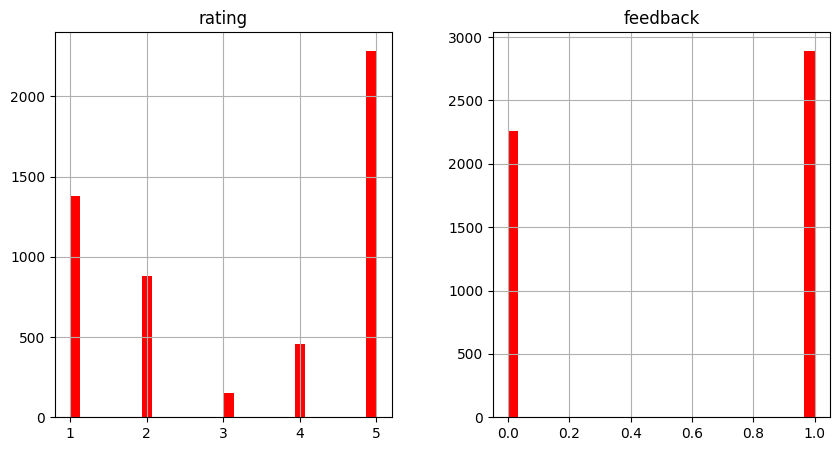

In [9]:
# Hàm này được sử dụng để vẽ biểu đồ histogram cho các cột kiểu số (int, float) trong DataFrame
# biểu đồ có chiều rộng là 10 inch và chiều cao là 5 inch
# biểu đồ histogram sẽ cho thấy tần suất xuất hiện của mỗi giá trị trong cột.
reviews.hist(bins = 30, figsize = (10,5), color = 'r')

In [10]:
# Sau khi chạy lệnh, DataFrame reviews sẽ có thêm một cột length, chứa số lượng ký tự trong mỗi chuỗi của cột verified_reviews
reviews['length'] = reviews['verified_reviews'].apply(len)

C:\Users\20521\AppData\Local\Temp\ipykernel_8380\1526877029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['length'] = reviews['verified_reviews'].apply(len)


<Axes: xlabel='length', ylabel='Count'>

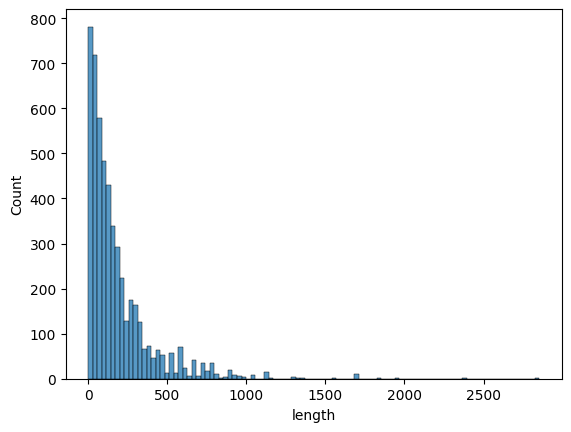

In [11]:
# vẽ biểu đồ số lượng các chữ cái trong từng reviews
sns.histplot(data = reviews, x = 'length', bins = 100)

In [12]:
reviews['length'].describe()

count    5149.000000
mean      183.000777
std       213.206411
min         1.000000
25%        51.000000
50%       116.000000
75%       235.000000
max      2851.000000
Name: length, dtype: float64

In [13]:
# Review with longest length
# Hiển thị review dài nhất
reviews[reviews['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [14]:
# Review with shortest length
# Hiển thị review ngắn nhất
reviews[reviews['length'] == 1]['verified_reviews'].iloc[0]

' '

In [15]:
# Review with mean length
# Hiển thị review độ dài trung bình 
reviews[reviews['length'] == 133]['verified_reviews'].iloc[0]

'Mic hears everything but only understands about half the first time, it often takes multiple tries until it gives the correct result.'

In [16]:
# Câu lệnh này sẽ lọc và tạo ra một DataFrame con, chỉ chứa các hàng trong reviews có giá trị cột feedback bằng 1 (feedback tích cực)
positive = reviews[reviews['feedback'] == 1]
positive


,rating,date,variation,verified_reviews,feedback,length
0,4,28-Jul-18,White Spot,Very helpful with daily activities,1,34
2,4,30-Jul-18,Black Spot,The ease to use product,1,23
5,5,29-Jul-18,Charcoal Fabric,Works great! Perfect for my office!,1,35
6,5,29-Jul-18,Heather Gray Fabric,Very cool and lots of fun! Used for a week and...,1,79
7,5,8-Jun-18,Black,Bought two of them and both work great. I'm no...,1,136
...,...,...,...,...,...,...
5141,5,30-Jul-18,Charcoal Fabric,Love our echo,1,13
5142,5,30-Jul-18,White Dot,"very handy in the kitchen, sets timer and give...",1,84
5146,3,1-Jul-18,Black,So far so good,1,14
5147,5,30-Jul-18,Black Dot,"I love this technology. I'm older, but this is...",1,175


In [17]:
# Câu lệnh này sẽ lọc và tạo ra một DataFrame con, chỉ chứa các hàng trong reviews có giá trị cột feedback bằng 0 (feedback tiêu cực)
negative = reviews[reviews['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
1,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0,181
3,2,26-Jul-18,White Spot,Honestly it's no different from the Echo dots ...,0,166
4,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0,114
9,1,30-Jul-18,Black Dot,I was really happy with my original echo so i ...,0,673
11,2,29-Jul-18,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0,307
...,...,...,...,...,...,...
5136,1,30-Jul-18,Black Show,I have been through 4 Shows now. And ALL OF T...,0,395
5143,2,30-Jul-18,White Dot,Not all that happy. The speaker isn’t great an...,0,197
5144,2,26-Jul-18,White Spot,I haven't figured out how to make or receive c...,0,117
5145,1,21-Jun-18,White,Two weeks after setting it up it no longer wor...,0,140


<Axes: xlabel='feedback', ylabel='count'>

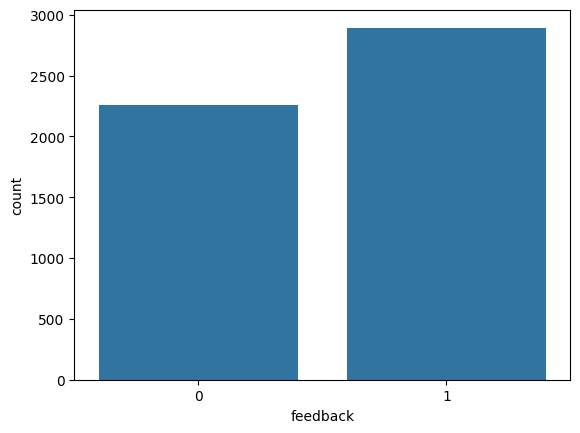

In [18]:
# Câu lệnh này sử dụng thư viện Seaborn (sns) 
# Để tạo biểu đồ countplot nhằm hiển thị số lượng các giá trị trong cột feedback của DataFrame reviews
sns.countplot(x = 'feedback', data = reviews)


<Axes: xlabel='rating', ylabel='count'>

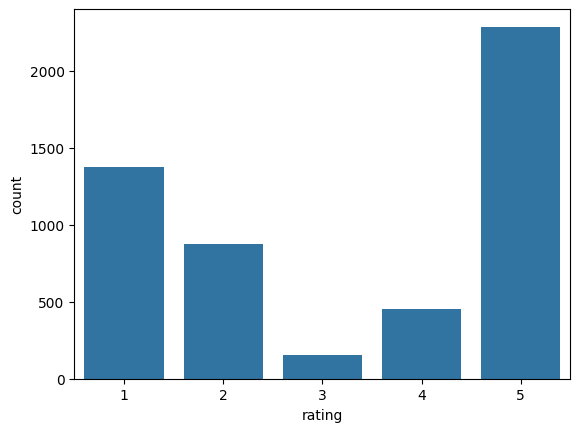

In [19]:
# tạo biểu đồ thể hiện các giá trị trong cột rating của dataframe reviews
sns.countplot(x = 'rating', data = reviews)


<Axes: >

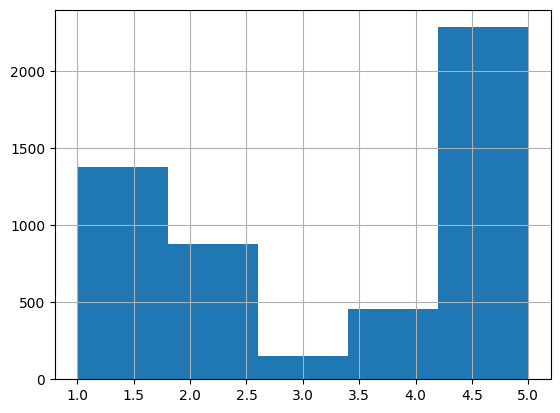

In [20]:
reviews['rating'].hist(bins = 5)

C:\Users\20521\AppData\Local\Temp\ipykernel_8380\3073896804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

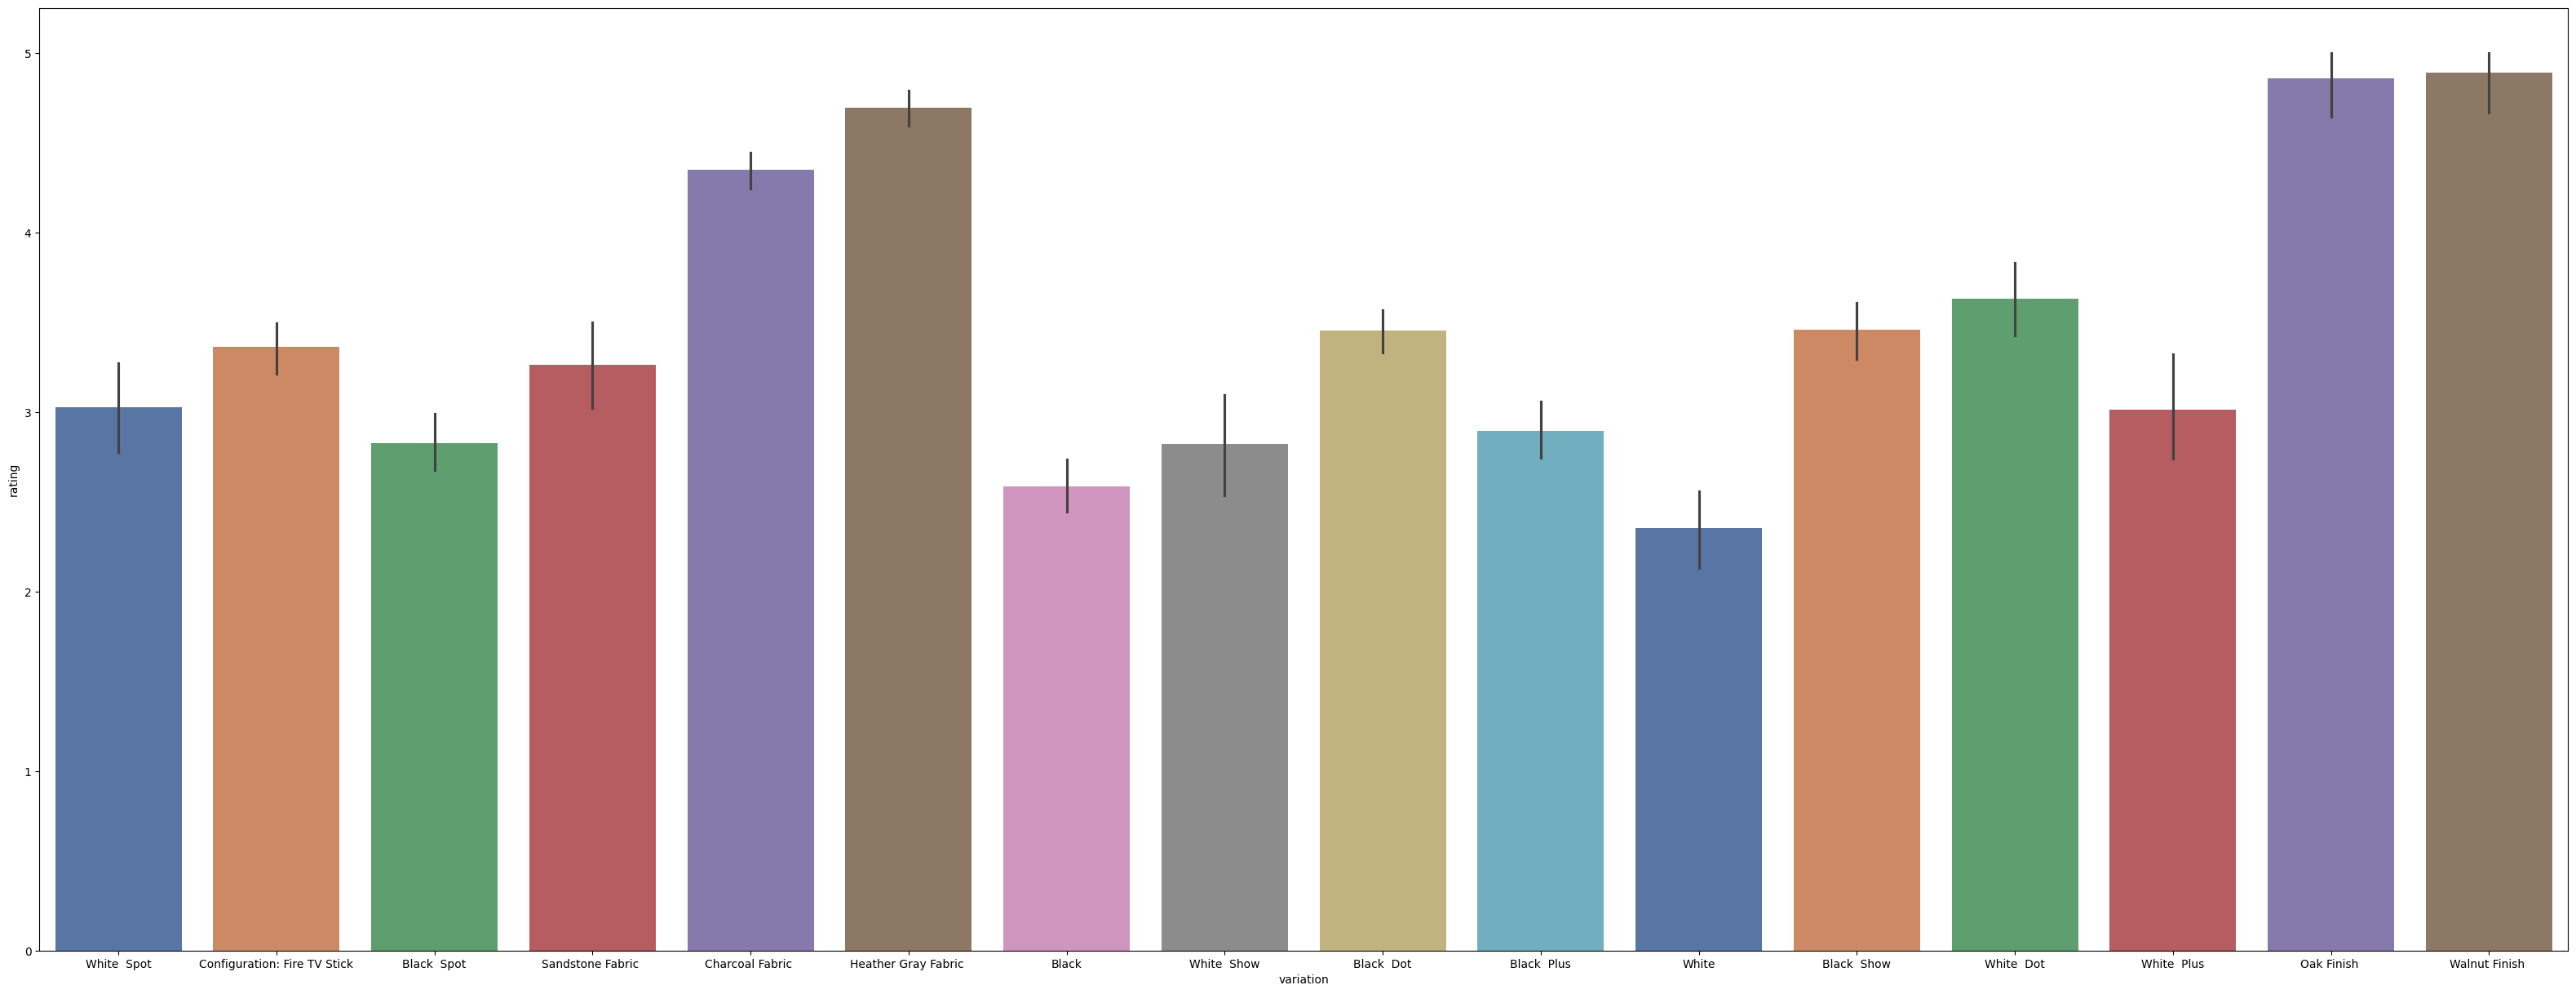

In [21]:
# Vẽ biểu đồ thể hiện giá trị của rating trung bình của từng variation (biến thể sản phẩm)
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


In [22]:
# Chuyển đổi cột verified_reviews thành một danh sách (list). Mỗi phần tử trong danh sách này là một chuỗi (string) tương ứng với một đánh giá.
sentences = reviews['verified_reviews'].tolist()
len(sentences)


5149

In [23]:
# hiển thị danh sách tất cả reviews
print(sentences)

['Very helpful with daily activities', 'I’m very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku’s That work just fine and are very quick.', 'The ease to use product', "Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.", "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things", 'Works great! Perfect for my office!', 'Very cool and lots of fun! Used for a week and still learning its capabilities.', "Bought two of them and both work great. I'm not much on electronics running my home, but Alexa does all that I want and need to be done.", 'This product is even better than I imagined. I love the timer setting, it reminds me to put the clothes in the dryer if i ask it to, and i love shopping list feature.  My family enjoys the games too

In [24]:
# Nối tất cả các chuỗi trong danh sách sentences thành một chuỗi duy nhất, với mỗi câu cách nhau một dấu cách " ". 
# Kết quả là một chuỗi dài chứa tất cả các đánh giá trong cột verified_reviews
sentences_as_one_string =" ".join(sentences)

In [25]:
sentences_as_one_string

'Very helpful with daily activities I’m very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku’s That work just fine and are very quick. The ease to use product Honestly it\'s no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I\'m listening too i really don\'t see the difference. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things Works great! Perfect for my office! Very cool and lots of fun! Used for a week and still learning its capabilities. Bought two of them and both work great. I\'m not much on electronics running my home, but Alexa does all that I want and need to be done. This product is even better than I imagined. I love the timer setting, it reminds me to put the clothes in the dryer if i ask it to, and i love shopping list feature.  My family enjoys the games too! It’s made my life

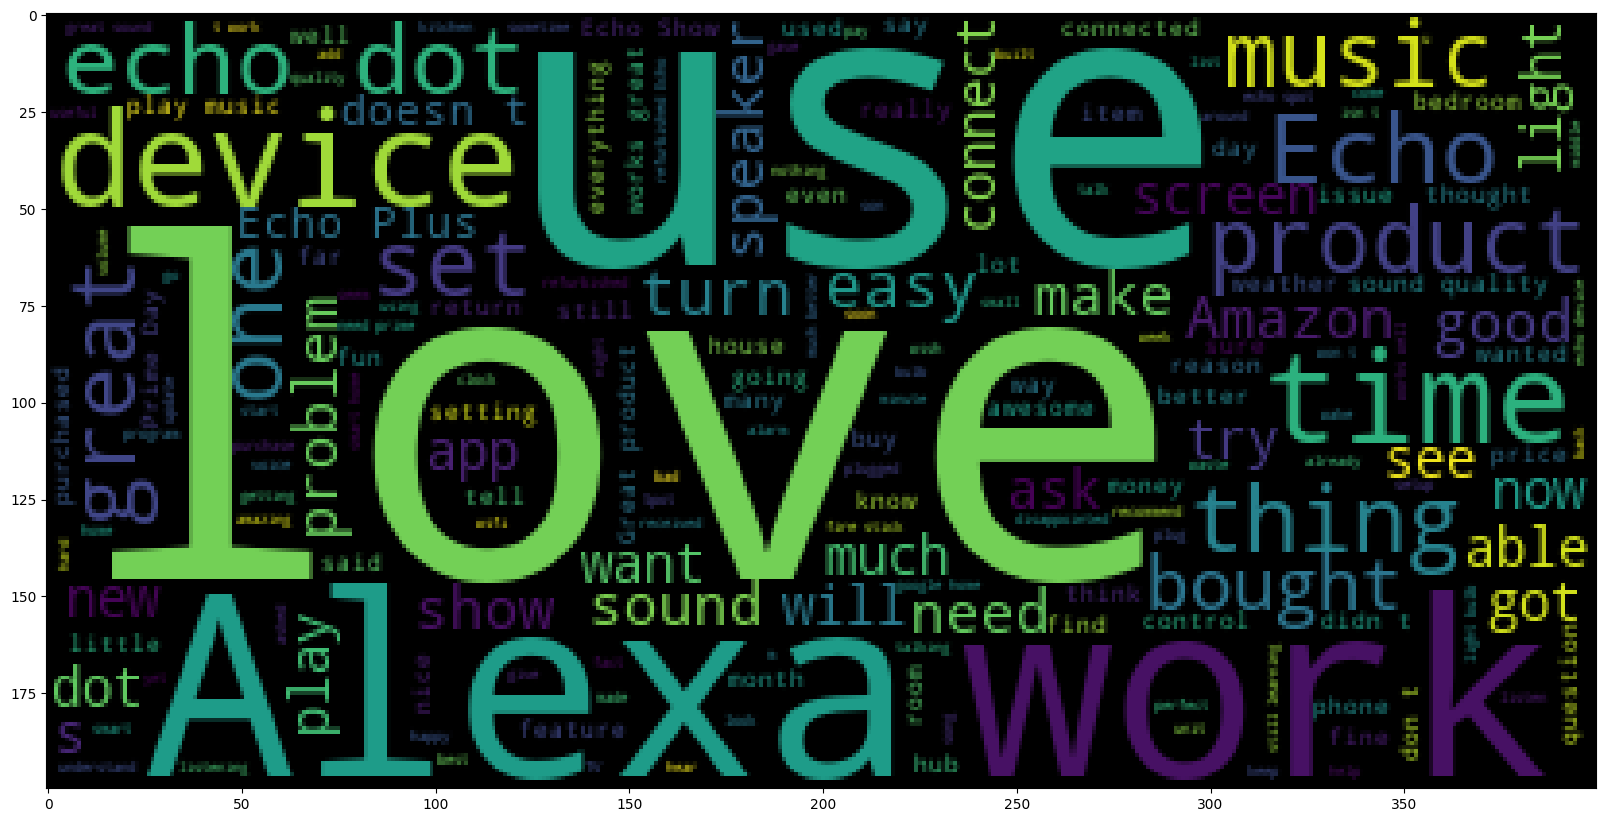

In [26]:
# Biểu đồ Word Cloud sẽ hiển thị tất cả các từ trong các đánh giá của cột verified_reviews, với các từ phổ biến hơn được hiển thị lớn hơn và rõ ràng hơn.
# Điều này giúp bạn trực quan hóa các từ khóa hay cụm từ mà người dùng sử dụng nhiều nhất trong đánh giá của họ.
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


In [27]:
# Chuyển đổi cột verified_reviews của danh sách các review tiêu cực thành một danh sách (list). 
# Mỗi phần tử trong danh sách này là một chuỗi (string) tương ứng với một đánh giá.
negative_list = negative['verified_reviews'].tolist()
negative_list

['I’m very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku’s That work just fine and are very quick.',
 "Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.",
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I was really happy with my original echo so i thought I'd get an echo dot to use in my bedroom. I was really disappointed in the audio quality so I connected an external speaker via bluetooth. The audio was much better but I started having problems with it loosing connection with the wifi, presumably due to interference from the bluetooth. Then  I connected a speaker via the auxiliary jack. when i did that, the auxiliary jack picked up interference from the wifi and I was woken up in the middle of the night by a horr

In [28]:
# Nối các danh review lại thành 1 câu
negative_sentences_as_one_string = " ".join(negative_list)

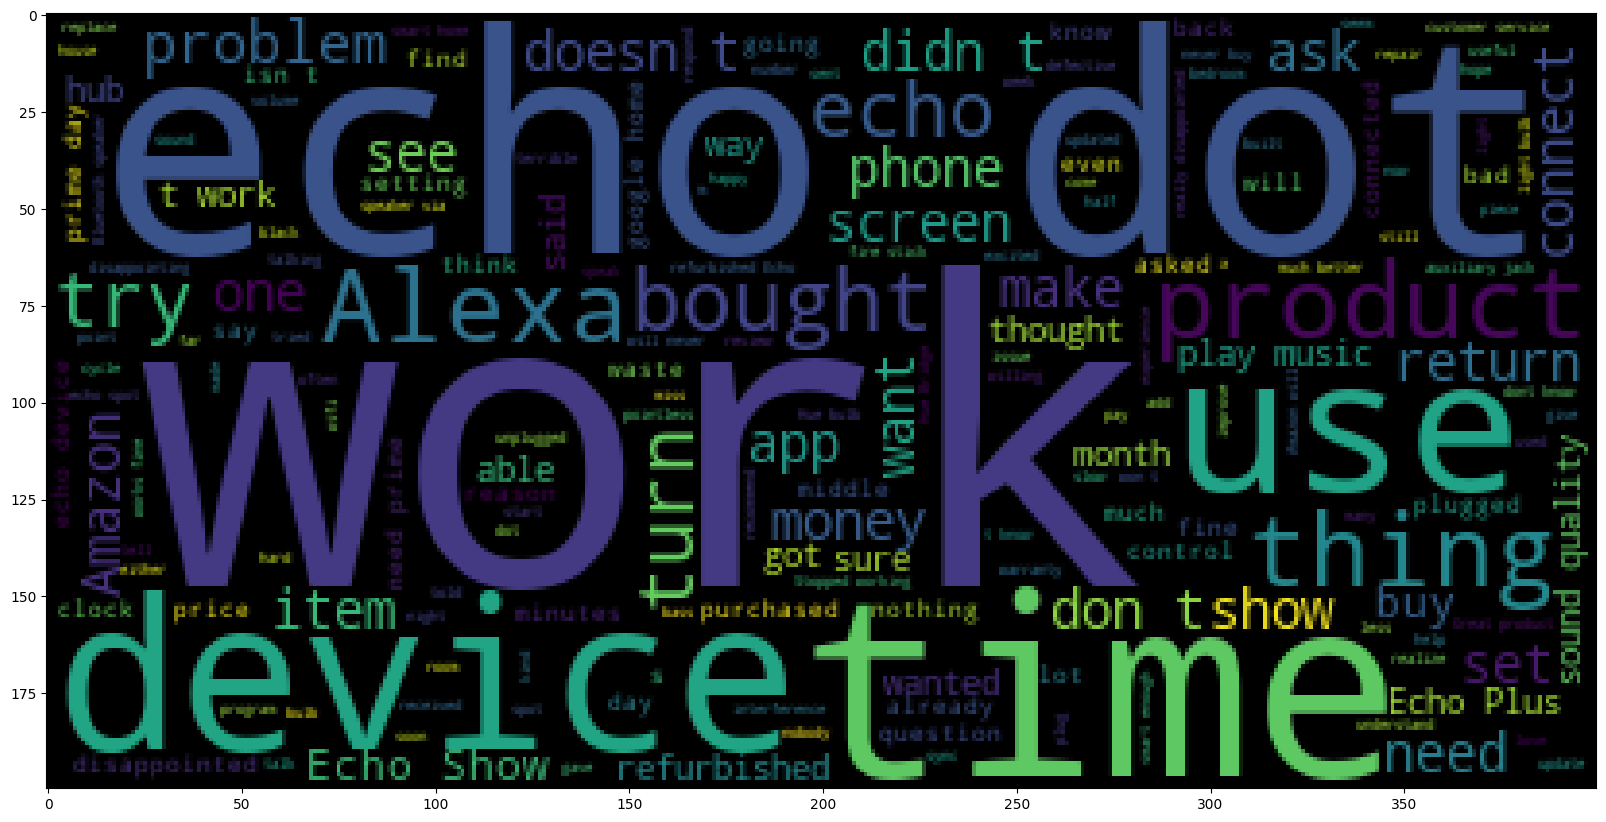

In [29]:
# Biểu đồ Word Cloud sẽ hiển thị tất cả các từ trong các đánh giá tiêu cực của cột verified_reviews, với các từ phổ biến hơn được hiển thị lớn hơn và rõ ràng hơn.
# Điều này giúp bạn trực quan hóa các từ khóa hay cụm từ mà người dùng sử dụng nhiều nhất trong đánh giá của họ.
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# 3. PERFORM DATA CLEANING (Biến đổi và làm sạch dữ liệu)

In [30]:
reviews

,rating,date,variation,verified_reviews,feedback,length
0,4,28-Jul-18,White Spot,Very helpful with daily activities,1,34
1,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0,181
2,4,30-Jul-18,Black Spot,The ease to use product,1,23
3,2,26-Jul-18,White Spot,Honestly it's no different from the Echo dots ...,0,166
4,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0,114
...,...,...,...,...,...,...
5145,1,21-Jun-18,White,Two weeks after setting it up it no longer wor...,0,140
5146,3,1-Jul-18,Black,So far so good,1,14
5147,5,30-Jul-18,Black Dot,"I love this technology. I'm older, but this is...",1,175
5148,1,25-Jul-18,Black Plus,It was supposed to come with a free Hue lightb...,0,114


In [31]:
# Bỏ cột date, rating, length trong dataframe reviews
reviews = reviews.drop(['date', 'rating', 'length'], axis = 1)
origin_data = reviews.copy()

In [32]:
reviews

,variation,verified_reviews,feedback
0,White Spot,Very helpful with daily activities,1
1,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0
2,Black Spot,The ease to use product,1
3,White Spot,Honestly it's no different from the Echo dots ...,0
4,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
...,...,...,...
5145,White,Two weeks after setting it up it no longer wor...,0
5146,Black,So far so good,1
5147,Black Dot,"I love this technology. I'm older, but this is...",1
5148,Black Plus,It was supposed to come with a free Hue lightb...,0


In [33]:
# Đây là một hàm của pandas dùng để chuyển đổi các biến variation thành dạng biến giả (dummy variables). 
# Mỗi giá trị phân loại trong cột variation sẽ được chuyển thành một cột mới
# với mỗi giá trị phân loại tương ứng sẽ có giá trị 0 (False) hoặc 1 (True).
variation_dummies = pd.get_dummies(reviews['variation'], drop_first=False)

In [34]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5147,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5148,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# Bỏ cột variation trong dataframe reviews
reviews.drop(['variation'], axis = 1, inplace = True)

In [36]:
# nối dataframe variation_dummies vào dataframe reviews
reviews = pd.concat([reviews, variation_dummies], axis =1)

In [37]:
reviews

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Very helpful with daily activities,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,"I’m very unhappy with this Firestick, every ti...",0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,The ease to use product,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Honestly it's no different from the Echo dots ...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,It's got great sound and bass but it doesn't w...,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,Two weeks after setting it up it no longer wor...,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5146,So far so good,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5147,"I love this technology. I'm older, but this is...",1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5148,It was supposed to come with a free Hue lightb...,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


# 4. PERFORM DATA CLEANING BY APPLYING PUNCTUATION REMOVAL, STOP WORDS REMOVAL, AND COUNT VECTORIZER
## Thực hiện làm sạch dữ liệu bằng các bước loại bỏ dấu câu, loại bỏ từ dừng, và áp dụng Count Vectorizer

In [38]:
# Trong đoạn mã này ta sẽ tạo hàm message_cleaning để làm sạch văn bản bằng cách thực hiện các bước sau:
# Loại bỏ dấu câu (punctuation removal).
import string
string.punctuation

# Loại bỏ từ dừng (stop words removal).
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Thực hiện việc làm sạch dữ liệu bằng cách gọi hàm message_cleaning
reviews_clean = reviews['verified_reviews'].apply(message_cleaning)

In [40]:
# Hiển thị dữ liệu sau khi làm sạch
reviews_clean

0                            [helpful, daily, activities]
1       [I’m, unhappy, Firestick, every, time, change,...
2                                    [ease, use, product]
3       [Honestly, different, Echo, dots, already, occ...
4       [got, great, sound, bass, doesnt, work, time, ...
                              ...                        
5145    [Two, weeks, setting, longer, works, connectio...
5146                                          [far, good]
5147    [love, technology, Im, older, easy, set, use, ...
5148    [supposed, come, free, Hue, lightbulb, Amazon,...
5149                                          [Easy, set]
Name: verified_reviews, Length: 5149, dtype: object

In [41]:
# Hiển thị dữ liệu review thứ 3 sau khi làm sạch
print(reviews_clean[3])

['Honestly', 'different', 'Echo', 'dots', 'already', 'occasionally', 'seeing', 'lyrics', 'song', 'Im', 'listening', 'really', 'dont', 'see', 'difference']


In [42]:
# Hiển thị dữ liệu review thứ 3 trước khi làm sạch
print(reviews['verified_reviews'][3])

Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.


In [43]:
# Vector hóa văn bản trong cột reviews['verified_reviews'] bằng cách sử dụng CountVectorizer từ thư viện sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_cvr = vectorizer.fit_transform(reviews['verified_reviews'])

In [44]:
# Hiển thị danh sách các từ đã được làm sạch
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [45]:
# Xóa cột verified_reviews trong dataframe reviews
reviews.drop(['verified_reviews'], axis = 1)

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5146,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5147,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5148,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
# Chuyển đổi ma trận reviews_cvr thành một DataFrame của pandas để dễ dàng thao tác và phân tích
reviews_cvr = pd.DataFrame(reviews_cvr.toarray())

In [47]:
# kết hợp DataFrame reviews và DataFrame reviews_cvr thành một DataFrame duy nhất có cả thông tin văn bản gốc và dữ liệu đã được vector hóa
review_df = pd.concat([reviews.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)

In [48]:
review_df

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,Very helpful with daily activities,1,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,"I’m very unhappy with this Firestick, every ti...",0,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,The ease to use product,1,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,Honestly it's no different from the Echo dots ...,0,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,It's got great sound and bass but it doesn't w...,0,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,Two weeks after setting it up it no longer wor...,0,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5145,So far so good,1,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5146,"I love this technology. I'm older, but this is...",1,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5147,It was supposed to come with a free Hue lightb...,0,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [49]:
review_df.drop(['verified_reviews'], axis =1, inplace = True)

In [50]:
x = review_df.drop(['feedback'],axis =1)

In [51]:
x

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5145,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5146,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5147,False,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y = reviews['feedback']

# 5. TRAIN A NAIVE BAYES CLASSIFIER MODEL (Huấn luyện mô hình phân loại bằng Naive Bayes)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
NB_classifier = MultinomialNB()
x_train.columns = x_train.columns.astype(str) 
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

<Axes: >

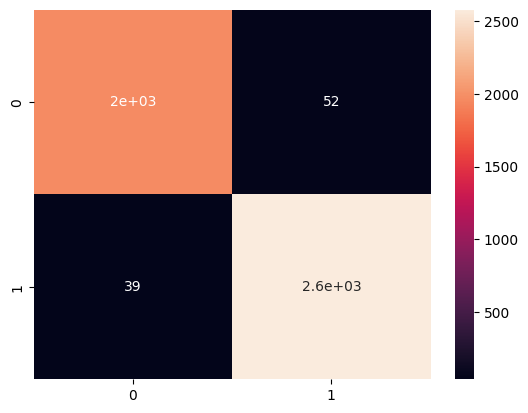

In [59]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

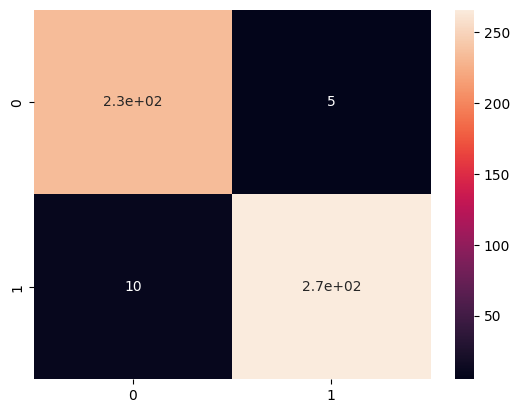

In [60]:
x_test.columns = x_test.columns.astype(str)
y_predict_test = NB_classifier.predict(x_test)
y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [61]:
print(x_test)

      Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
1398  False        True        False        False        False   
566   False       False        False        False        False   
2181  False       False        False        False        False   
2497  False        True        False        False        False   
2962  False       False        False        False        False   
...     ...         ...          ...          ...          ...   
5135  False       False        False         True        False   
3784  False       False        False        False        False   
2935  False       False        False        False        False   
198   False       False         True        False        False   
3428  False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
1398             False                         False                 False   
566              False                         Fals

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.98      0.96      0.97       276

    accuracy                           0.97       515
   macro avg       0.97      0.97      0.97       515
weighted avg       0.97      0.97      0.97       515



# 7. Dự đoán đánh giá (Feedback)

## Mô tả các bước:
### B1: Chuẩn bị bộ test (trong file test.xlsx - chưa có cột Feedback)
### B2: Xử lý dữ liệu, xóa các cột dư thừa, biến đổi cấu trúc
### B3: Sử dụng mô hình Naive Bayes để dự đoán
### B4: Ghi kết quả vào file test.xlsx (file sẽ xuất hiện cột Feedback)



In [63]:
# Hàm xử lý dữ liệu
def process_data(data, origin_data):
    data = data.drop(['date', 'rating'], axis = 1)
    origin_data = origin_data.drop(['feedback'], axis = 1)
    data = pd.concat([origin_data, data], axis=0)
    variation_dummies = pd.get_dummies(data['variation'], drop_first=False)
    data.drop(['variation'], axis = 1, inplace = True)
    data = pd.concat([data, variation_dummies], axis =1)

    # Vector hóa văn bản trong cột reviews['verified_reviews'] bằng cách sử dụng CountVectorizer từ thư viện sklearn
    vectorizer = CountVectorizer(analyzer = message_cleaning)
    reviews_cvr = vectorizer.fit_transform(data['verified_reviews'])
    # Xóa cột verified_reviews trong dataframe reviews
    data.drop(['verified_reviews'], axis = 1)
        
    # Chuyển đổi ma trận reviews_cvr thành một DataFrame của pandas để dễ dàng thao tác và phân tích
    reviews_cvr = pd.DataFrame(reviews_cvr.toarray())
    
    #  kết hợp DataFrame reviews và DataFrame reviews_cvr thành một DataFrame duy nhất có cả thông tin văn bản gốc và dữ liệu đã được vector hóa
    review_df = pd.concat([data.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)
    review_df.drop(['verified_reviews'], axis =1, inplace = True)
    return review_df

In [64]:
# Đọc file để lấy dữ liệu test
test_data = pd.read_excel('test.xlsx')
num_rows_test_data = len(test_data)


In [65]:
# Gọi hàm xử lý dữ liệu
test_data = process_data(test_data, origin_data)

In [66]:
test_data.columns = test_data.columns.astype(str) 
test_data_predict = NB_classifier.predict(test_data)

# test_data_predict
print(test_data_predict[-num_rows_test_data:])
result = test_data_predict[-num_rows_test_data:]

# Mapping 0 -> 'Negative' và 1 -> 'Positive'
result = np.where(result == 0, 'Negative', 'Positive')
result_df = pd.DataFrame(result, columns=['feedback'])

# Đọc file Excel hiện tại vào DataFrame
output_data = pd.read_excel('test.xlsx')

# Thêm cột 'feedback' vào DataFrame đã có
output_data['feedback'] = result_df['feedback']

# Ghi lại DataFrame vào file Excel, giữ nguyên các dữ liệu cũ
output_data.to_excel('test_result.xlsx', index=False)

[1 1 1 0 0 0 1 1 1 1 1 1 1]


# Xây dựng ứng dụng Web để hiện thực mô hình


In [67]:
import pickle
import re
from sklearn.preprocessing import MinMaxScaler
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)
data.dropna(inplace=True)
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [69]:
# Tạo folder Models
import os
os.makedirs('Models', exist_ok=True)

cv = CountVectorizer(max_features = 2500) 
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [70]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 15)
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [71]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

pickle.dump(NB_classifier, open('Models/NB_classifier.pkl', 'wb'))